# Pre-processing

In [2]:
import pandas as pd
df = pd.read_csv(r"E:\Study\Big Data\Bigadata\cleaned_taxi_trip_data.csv")
df.head()

,Unnamed: 0,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,3,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,...,61.67,231,138,2018,3,29,3,13,3317.0,61.67
1,4,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,...,62.47,87,138,2018,3,29,3,14,3648.0,62.47
2,5,11.60,1,N,1,42.0,0.0,0.5,14.57,5.76,...,63.13,68,138,2018,3,29,3,14,3540.0,63.13
3,10,5.10,1,N,1,26.5,1.0,0.5,5.65,0.00,...,33.95,186,33,2018,3,29,3,16,2585.0,33.95
4,12,11.11,1,N,1,45.5,1.0,0.5,10.61,5.76,...,63.67,163,138,2018,3,29,3,16,4521.0,63.67


In [3]:
df.isnull().sum()

Unnamed: 0                      0
trip_distance                   0
rate_code                       0
store_and_fwd_flag              0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
imp_surcharge                   0
total_amount                    0
pickup_location_id              0
dropoff_location_id             0
year                            0
month                           0
day                             0
day_of_week                     0
hour_of_day                     0
trip_duration                   0
calculated_total_amount    663659
dtype: int64

In [6]:
df = df.dropna(subset=[
    "trip_distance",
    "fare_amount",
    "total_amount"
])

In [7]:
df = df[
    (df["trip_distance"] > 0) &
    (df["fare_amount"] > 0) &
    (df["total_amount"] > 0)
]


In [8]:
X = df[["trip_distance", "fare_amount"]]
y = df["total_amount"]

# Training

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2

(5.854394991952579, 0.9314745345575333)

# Visualization

C:\Users\sanju\AppData\Local\Temp\ipykernel_22980\1922618129.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare = df.groupby("distance_bin")["total_amount"].mean()


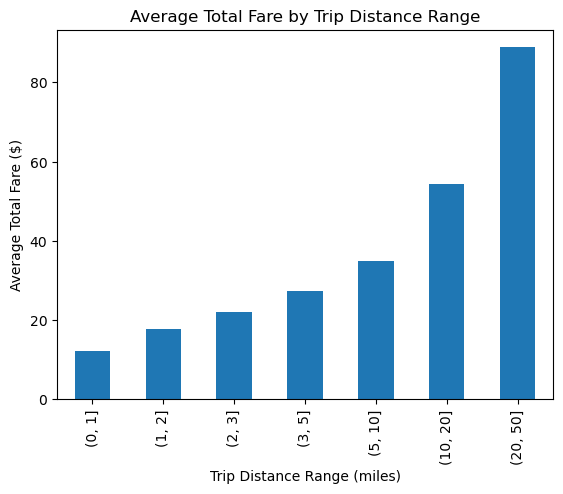

In [20]:
import matplotlib.pyplot as plt
# Create distance bins
df["distance_bin"] = pd.cut(
    df["trip_distance"],
    bins=[0, 1, 2, 3, 5, 10, 20, 50]
)
# Compute average fare per bin
avg_fare = df.groupby("distance_bin")["total_amount"].mean()
# Plot bar chart
plt.figure()
avg_fare.plot(kind="bar")
plt.xlabel("Trip Distance Range (miles)")
plt.ylabel("Average Total Fare ($)")
plt.title("Average Total Fare by Trip Distance Range")
plt.show()

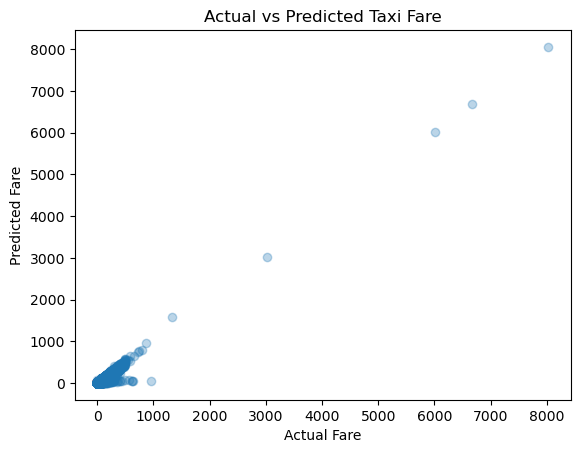

In [16]:
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Taxi Fare")
plt.show()